In [77]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np


In [4]:
iamge_size = 256
batch_size = 32
channels=3
epochs=50

In [5]:

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\LENOVO\OneDrive\Desktop\Machine\plant Village",
    image_size=(256, 256),
    batch_size=32
)


Found 4091 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

In [7]:
len(dataset)

128

In [8]:
128*32


4096

In [9]:
for image_batch, label_batch in dataset.take(1):
    print("Full shape:", image_batch.shape)           # e.g., (32, 256, 256, 3)
    print("Batch size:", image_batch.shape[0])        # e.g., 32


Full shape: (32, 256, 256, 3)
Batch size: 32


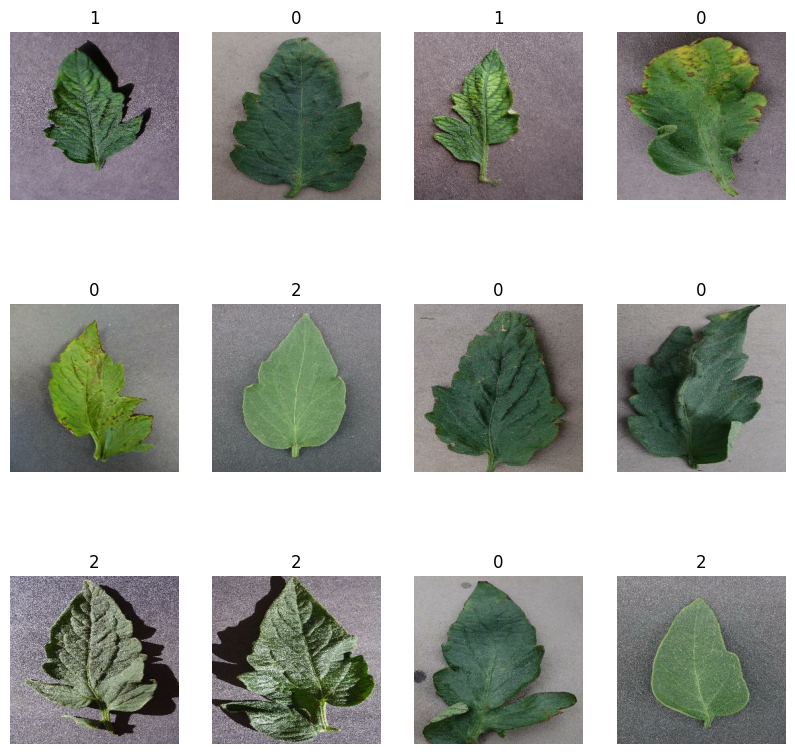

In [10]:
plt.figure(figsize=(10, 10))  # ✅ use 'figsize' instead of 'figure'
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(label_batch[i].numpy())
        plt.axis("off")
plt.show()


In [11]:
len(dataset)

128

In [12]:
# Import the required function
from tensorflow.keras.utils import image_dataset_from_directory

# Create the training dataset
train_ds = image_dataset_from_directory(
    directory=r"C:\Users\LENOVO\OneDrive\Desktop\Machine\plant Village",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(256, 256),
    batch_size=32
)

# Create the validation dataset
val_ds = image_dataset_from_directory(
    directory=r"C:\Users\LENOVO\OneDrive\Desktop\Machine\plant Village",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(256, 256),
    batch_size=32
)


Found 4091 files belonging to 3 classes.
Using 3273 files for training.
Found 4091 files belonging to 3 classes.
Using 818 files for validation.


In [13]:
total_data = 100  # assume 100% data
validation_split = total_data * 0.10
test_split = total_data * 0.10
train_split = total_data - validation_split - test_split


In [14]:
train_size = 0.8
len(train_ds)*train_size

82.4

In [15]:
train_ds= dataset.take(103)
len(train_ds)

103

In [16]:
test_ds = dataset.skip(103)
len(test_ds)

25

In [17]:
val_size=0.1
len(dataset)*val_size

12.8

In [18]:
val_ds = test_ds.take(12)
len(val_ds)

12

In [19]:
test_ds = test_ds.skip(12)
len(test_ds)

13

In [20]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    val_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [21]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [22]:
len(train_ds)

102

In [23]:
len(val_ds)

14

In [24]:
len(test_ds)

13

In [25]:
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
len(train_ds)

102

In [27]:
len(val_ds)

14

In [28]:
len(test_ds)

13

In [29]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [30]:

from tensorflow.keras import layers

IMAGE_SIZE = 256  # or 224, 128, etc.

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])


In [31]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [32]:


# Define constants
IMAGE_SIZE = 256
CHANNELS = 3
n_classes = 3
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Define rescaling layer
resize_and_rescale = layers.Rescaling(1./255)

# Build the model
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

# You don't need model.build() unless you're manually managing the model — it builds automatically
model.summary()


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.summary

<bound method Model.summary of <Sequential name=sequential_2, built=False>>

In [34]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [48]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)


Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 1.0000 - loss: 1.1208e-05 - val_accuracy: 1.0000 - val_loss: 7.9376e-06
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 1.0000 - loss: 1.1483e-05 - val_accuracy: 1.0000 - val_loss: 7.1888e-06
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 1.0000 - loss: 8.6469e-06 - val_accuracy: 1.0000 - val_loss: 6.4081e-06
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 1.0000 - loss: 9.5807e-06 - val_accuracy: 1.0000 - val_loss: 5.8466e-06
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 1.0000 - loss: 6.5908e-06 - val_accuracy: 1.0000 - val_loss: 5.2738e-06
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 1.0000 - loss: 7.3271e-06 - val_accuracy: 1.0000 - val_loss: 4.8248e-06
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 1.0000 - loss: 5.9350e-06 - val_accuracy: 1.0000 - val_loss: 4.3990e-06
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1

In [51]:
scores = model.evaluate(test_ds)

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 410ms/step - accuracy: 1.0000 - loss: 2.0401e-06


In [53]:
scores

[2.4093819774861913e-06, 1.0]

In [54]:
history

In [56]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 102}

In [57]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [62]:
type(history.history['loss'])

list

In [63]:
len(history.history['loss'])

10

In [64]:
history.history['loss'][:5] 

[9.958840564650018e-06,
 9.03362797544105e-06,
 8.169631655619014e-06,
 7.476325663446914e-06,
 6.867898264317773e-06]

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [73]:

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
EPOCHS = len(acc)  # Automatically detect how many epochs were run


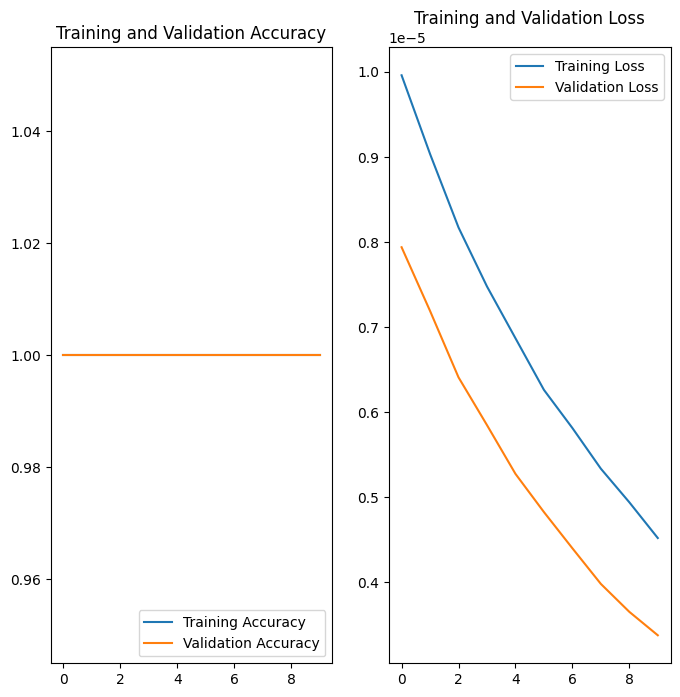

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


first image to predict
actual label: Tomato_Bacterial_spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step
predicted label: Tomato_Bacterial_spot


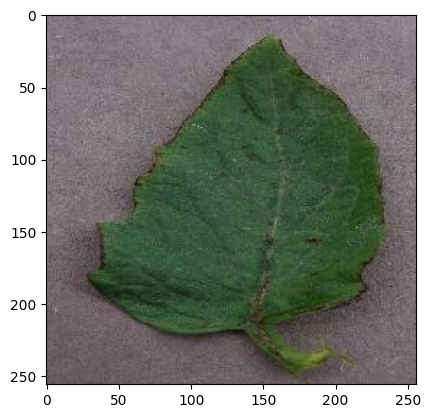

In [49]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

Write a function for inference

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

Now run inference on few sample images

In [79]:


def predict(model, image):
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    predictions = model.predict(image)
    predicted_index = np.argmax(predictions[0])
    confidence = round(100 * np.max(predictions[0]), 2)
    predicted_class = class_names[predicted_index]
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


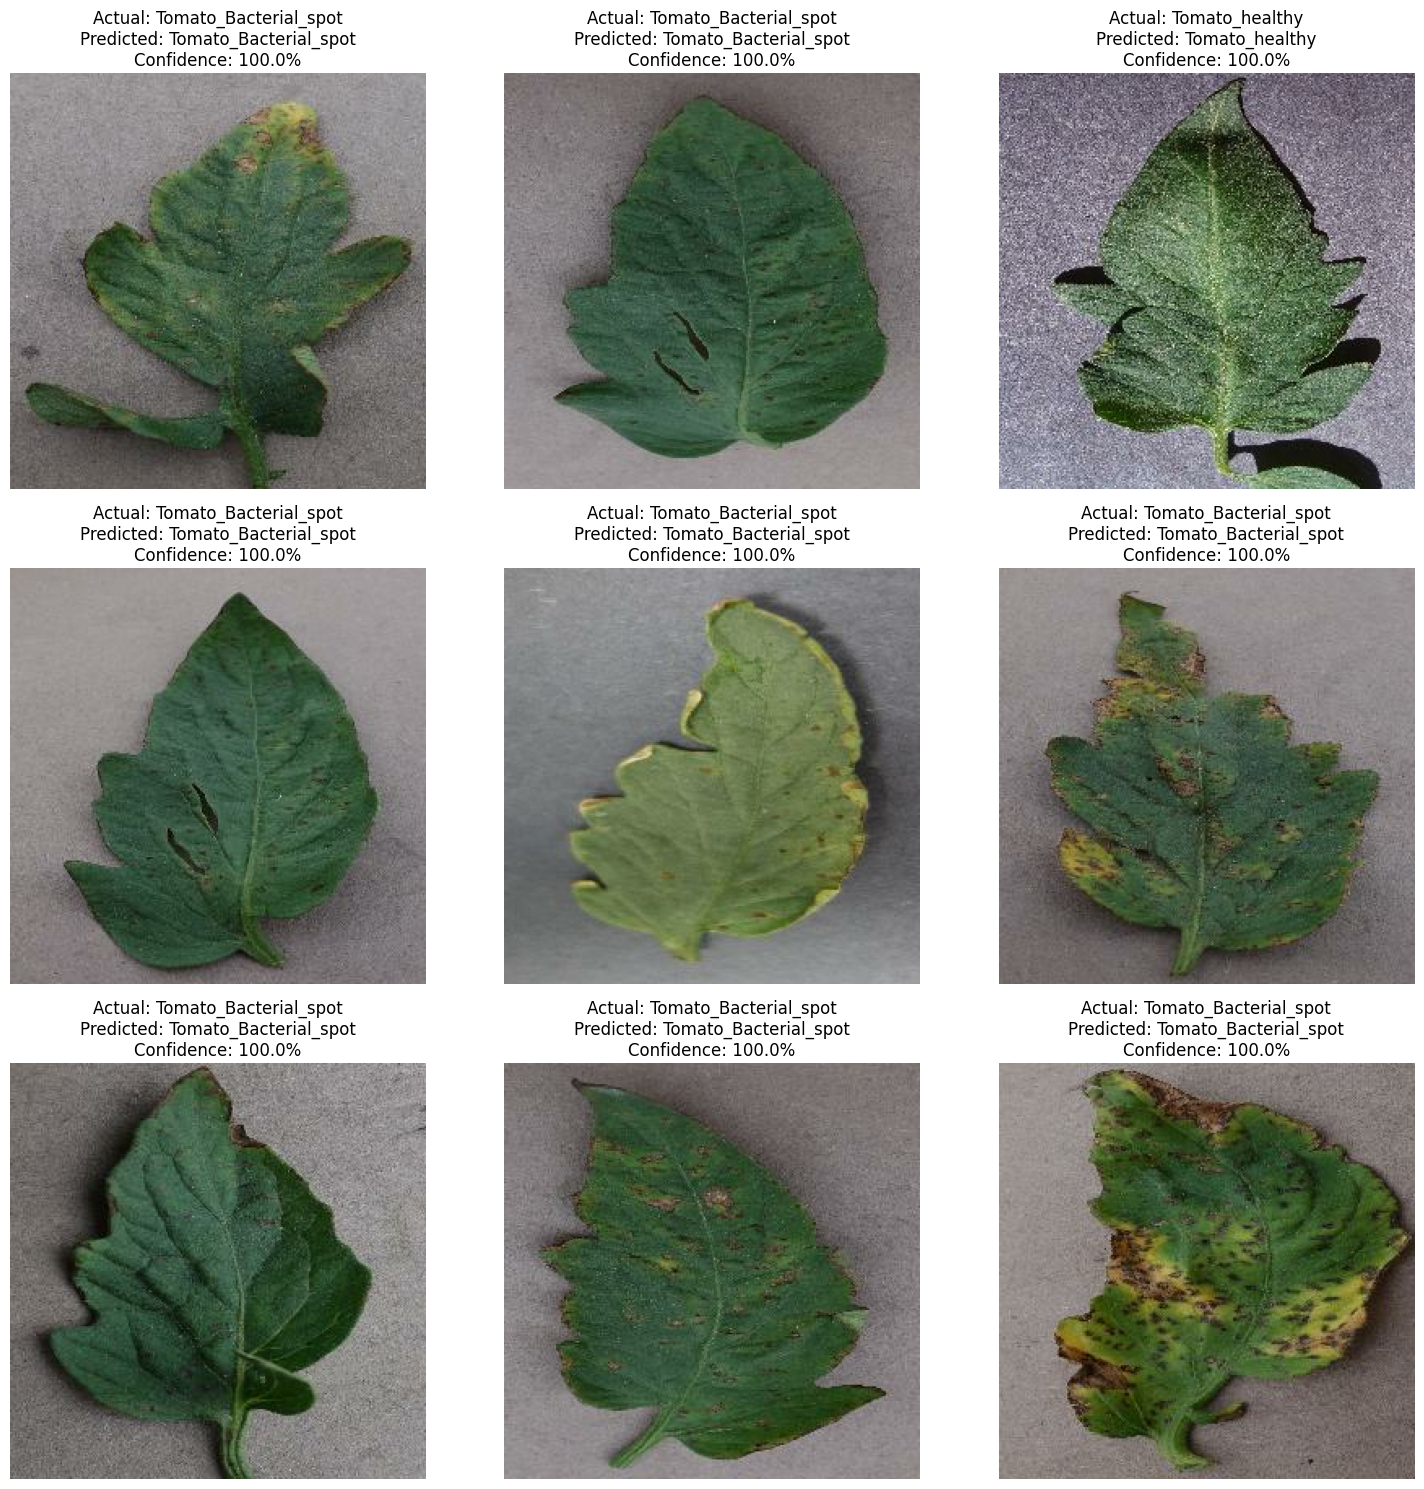

In [80]:
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):  # Takes 1 batch from test dataset
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i].numpy()]
        
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%")
        plt.axis("off")

plt.tight_layout()
plt.show()


Saving the Model

In [84]:
import os

# Create the models directory if it doesn't exist
model_dir = "../models"
os.makedirs(model_dir, exist_ok=True)

# Filter numeric folders only, ignore non-numeric ones
existing_versions = [
    int(i) for i in os.listdir(model_dir) if i.isdigit()
]

# If none exist, default to version 0
model_version = max(existing_versions + [0]) + 1



print(f"Model saved to: {model_dir}/{model_version}")


Model saved to: ../models/1


In [85]:
model.save("../tomatoes.h5")